In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

import slug

datafile = '../data/country_gdp_growth.csv'
shapefile = '../data/world_shape/ne_10m_admin_0_countries_lakes.shp'

colors = 9
cmap = 'RdYlGn'
figsize = (16, 10)
year = '2016'
cols = ['Country Name', 'Country Code', year]
title = 'Rast BDP držav v letu {}'.format(year)
imgfile = 'img/{}.png'.format(slug.slug(title))

description = '''
Individuals who have used the Internet from any location in the last 3 months via any device based on the International Telecommunication Union,
World Telecommunication/ICT Development Report and database. Data: World Bank - worldbank.org • Author: Ramiro Gómez - ramiro.org'''.strip()

In [2]:
world = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']]
world.head()

,ADM0_A3,geometry
0,IDN,(POLYGON ((117.7036079039552 4.163414542001791...
1,MYS,(POLYGON ((117.7036079039552 4.163414542001791...
2,CHL,(POLYGON ((-69.51008875199994 -17.506588197999...
3,BOL,POLYGON ((-69.51008875199994 -17.5065881979999...
4,PER,(POLYGON ((-69.51008875199994 -17.506588197999...


In [3]:
df = pd.read_csv(datafile, skiprows=4, usecols=cols)
df.sample(5)

,Country Name,Country Code,2016
49,Curacao,CUW,NaN
63,Europe & Central Asia,ECS,1.832730
144,"Macao SAR, China",MAC,-0.863119
192,Portugal,PRT,1.619415
68,Spain,ESP,3.274463


In [4]:
merged = world.merge(df, left_on='ADM0_A3', right_on='Country Code')
merged.describe()

,2016
count,198.000000
mean,2.984818
std,3.764650
min,-13.621458
25%,1.388567
50%,3.048776
75%,4.656190
max,28.223844


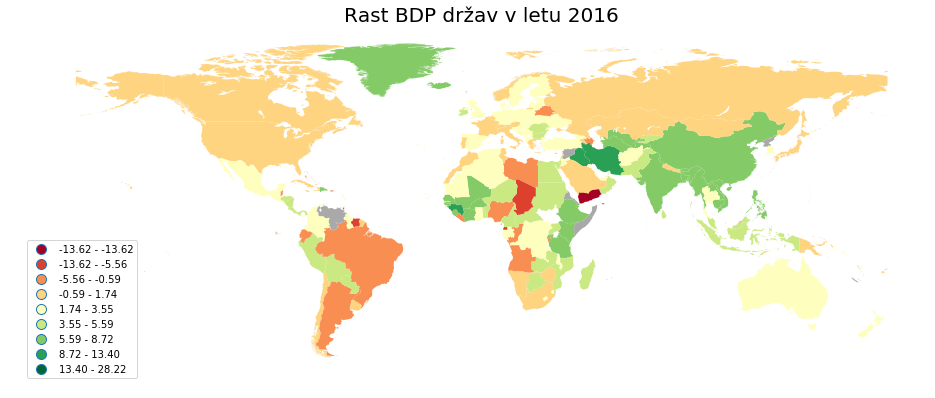

In [5]:
ax = merged.dropna().plot(column=year, cmap=cmap, figsize=figsize, scheme='fisher_jenks', k=colors, legend=True)

merged[merged.isna().any(axis=1)].plot(ax=ax, facecolor='#A9A9A9')

ax.set_axis_off()
ax.set_title(title, fontdict={'fontsize': 20})
ax.get_legend().set_bbox_to_anchor((.12, .4))